### This assignment is mainly about Exploratory Data Analysis (EDA), we want to use all the features of a person to predict their income levels. 

- First and foremost we will be exploring the data
- Use features that are relevant draw some insights and lay out patterns
- Use charts / graphs to convey the message of the finding

I am assuming that this dataset will have some findings that I am anticipating, such as gender / age income to be higher for male and older people to earn more. I also expect that that education definitely matters, occupation matters, education and occupation are correlated so I am expecting them to follow a similar pattern. 

In [1]:
# 1. Imports and Data Loading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Explore the data

In [2]:
adult_income = pd.read_csv('adult.csv')

In [5]:
adult_income.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
20176,62,?,182687,Some-college,10,Married-civ-spouse,?,Wife,White,Female,0,0,45,United-States,>50K
41017,17,Private,276718,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
20812,22,?,153131,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
36836,36,Local-gov,380614,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,Germany,>50K
46026,52,Private,195638,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,45,United-States,<=50K


In [ ]:
print(adult_income.shape)
print(adult_income.info())

(48842, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
age                   0
workclass          2799
fnlwgt     

### Remove rows with missing values

In [ ]:
print(adult_income.isin(['?']).sum())

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [10]:
adult_income_cl = adult_income[~adult_income.isin(['?']).any(axis=1)]
print(adult_income_cl.shape)

(45222, 15)


### Income distribution

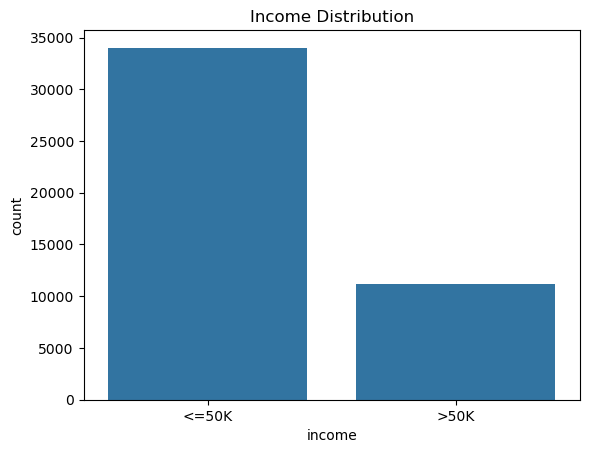

In [13]:
sns.countplot(x='income', data=adult_income_cl)
plt.title('Income Distribution')
plt.show()

##### We can see that the income is left skewed, <=50K is almost 3x more than 50K in the adult income dataset, an imbalance distrubtion.

### Age Distrubition by Income

##### Do older people earn more?

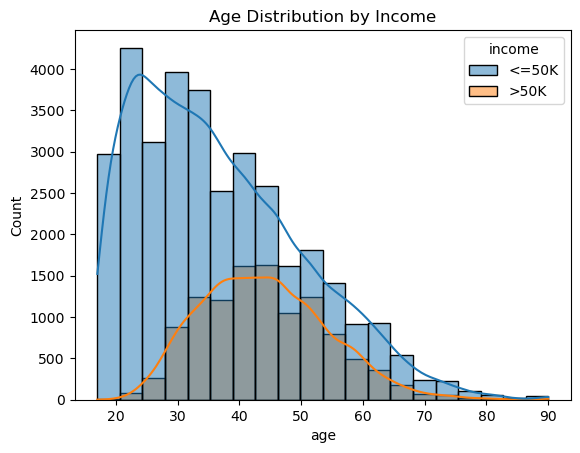

In [29]:
sns.histplot(data=adult_income_cl, x='age', hue='income', bins=20, kde=True)
plt.title('Age Distribution by Income')
plt.show()

##### Since the dataset is imbalanced its harder to distinguish properly using a countplot alone, but it can be seen that over 50K earners are around the middle age 40+, while less than 50K earners are all in the 20-30 age group.

## Occupation vs Education

- Does higher education correlate with higher income?

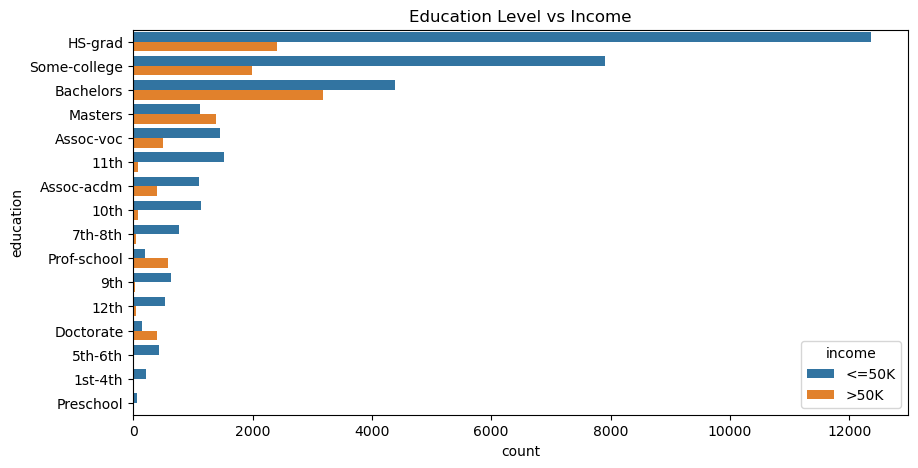

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(y='education', hue='income', data=adult_income_cl, order=adult_income_cl['education'].value_counts().index)
plt.title('Education Level vs Income')
plt.show()

##### The finding here proves that education level for income matters

- HS-grad majority earning <=50k
- Some-college similar to HS-grad
- Assoc-acdm  / Assoc-voc all below 50k
- Bachelors the earning is slightly better than the first 2 categories
- Masters more than 50K makes since this is a lot of education pursued
- All grade school is less than 50k
- Prof-school a professional for degrees such as medical or dental is noticeably higher than 50k

### Occupation vs Income

- Which job are more likely to earn more than 50K?

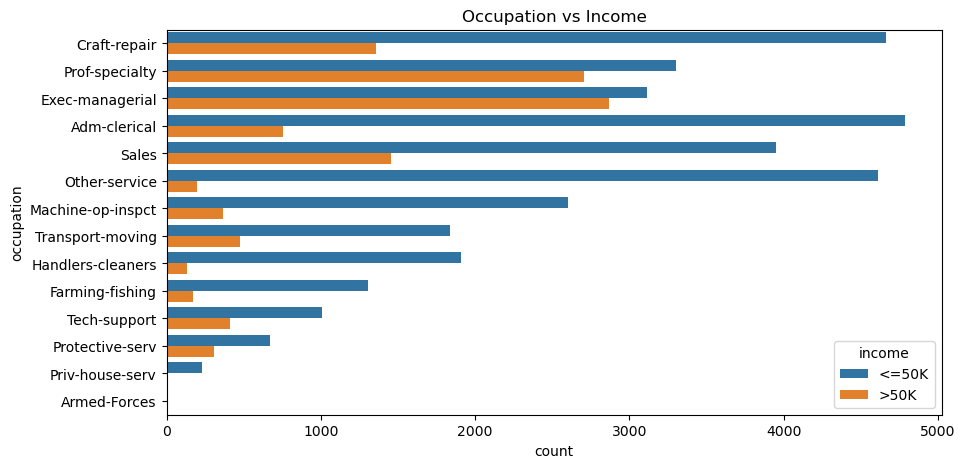

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(y='occupation', hue='income', data=adult_income_cl, order=adult_income_cl['occupation'].value_counts().index)
plt.title('Occupation vs Income')
plt.show()

##### Most common jobs where more than 50K earned are Prof-specialty, Exec-managerial, sales, and craft-repair, either since the dataset is imbalanced it looks as if every occuptation is not enough for earning a good salary but that is not true.

### Distrubtion by Gender

- Is there a gender disparitiy in income?

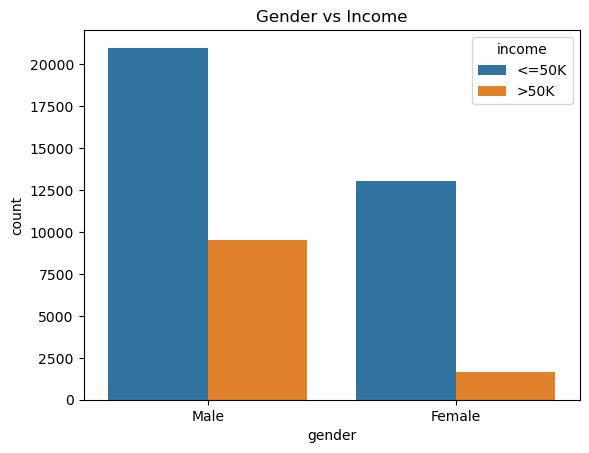

In [39]:
sns.countplot(x='gender', hue='income', data=adult_income_cl)
plt.title('Gender vs Income')
plt.show()

##### When it comes to gender it seems that there less female in the workforce hence the lower sized bar, when it comes to income male predominantly makes more than 50k versus female, it is almos a 4x time difference, and less than 50k since there are more males in the workforce they also heavily skew the less than 50k chart.

### Income by Hours-per-week

- Does more hours lead to earning more overall?

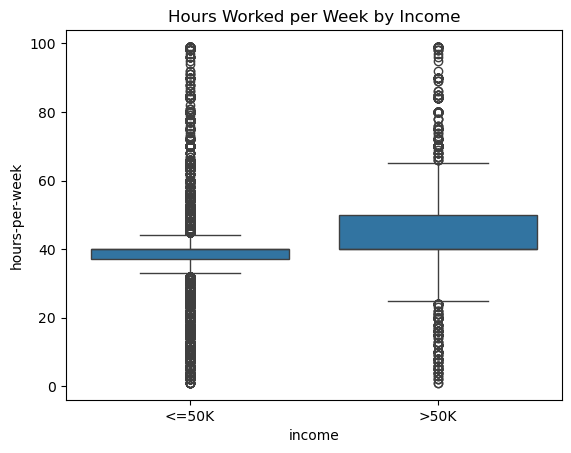

In [40]:
sns.boxplot(x='income', y='hours-per-week', data=adult_income_cl)
plt.title('Hours Worked per Week by Income')
plt.show()

##### It seems that more than 50K the median is more than 40 hours compared to <= 50k, that means that the income for > 50K a lot of these people are putting in slightly more hours, the overall boxplot shows that it is slightly higher median and IQR than the other category. Education and occupation definitely plays a role since in the right category people working 20 hours or less are earning > 50k. 




# Summary

##### Overall this dataset showed that the dataset was highly imbalanced, this is not something that I expected to be so heavily left skewed. The less than 50k category being much more dominant by almost 3 times, so it was hard to draw conclusions more. Everything did align with what I anticipated, I expected a lot of adult to earn more if they had more education or a better occupation. The age and gender one was not a surprise at all. The one that surprised me the most was the Hours-per-week, I did not expect that the more than 50k cateorgy would have a higher median. Overall this was a fun and interesting dataset to draw conclusions from, I did enjoy it.